Consider a heavy, uniform inextensible chain (or cable) of total mass $M$ and length $L$ whose position of static equilibrium in the gravitational field is the vertical $z$ axis. The upper extremity of the chain is located at $z=L$ and assumed that the chain is roated by hand in vertical axis at a known uniform angular velocity $\Omega$. T**he lower extremity of the chain is located at $z=0$, where it is freely hanging**. At resonance, the chain thus moves away from the vertical axis by a horizontal amount $r=r(z)$, which is to be determined. Once a resonant configuration has been established, the boundary conditions are taken to be:


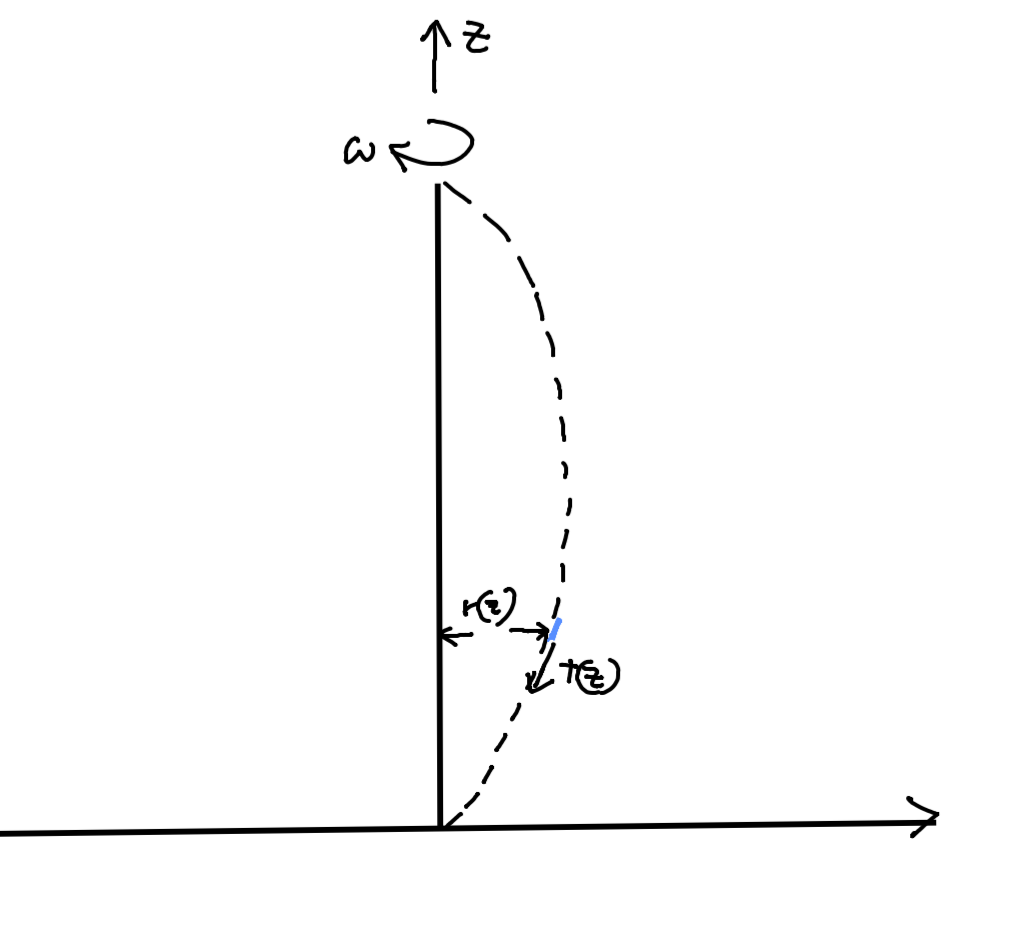




\begin{align} 
r(z=0)=r(z=L)=0  \tag 1               
\end{align}

In the sequel, $M$ and $L$ will represent the chain's mass and equilibrium length, respectively, with $\lambda=M / L$ the mass per unit length.


$$
T(z)=\frac{M g}{L} z  \tag 2
$$

In this expression, $g$ is the acceleration due to gravity . The form of the resulting equation for the stationary solutions of the motion is given by:

$$
\frac{\partial}{\partial z}\left[T(z) \frac{\partial}{\partial z} r(z)\right]+\Omega^{2} \lambda r(z)=0  \tag 3
$$

In order to solve this equation for the allowed angular frequencies, $\Omega$, and the corresponding configuration functions, $r(z)$, we first set

$$
x=\frac{z}{L} \tag 4
$$

Inserting Eq. (4) into Eqs. (2) and (3) then gives, with $\sigma^{2} \equiv \Omega^{2} / g$, that:

$$
\frac{\partial^{2} r}{\partial x^{2}}+\frac{1}{x} \frac{\partial r}{\partial x}+\sigma^{2} \frac{r}{x}=0 \tag 5
$$

Finally, introduce a second change of variable, thus:

$$
w^{2}=4 \sigma^{2} x \tag 6
$$

Equation (5) then becomes: 

$$
\frac{\partial^{2} r}{\partial w^{2}}+\frac{1}{w} \frac{\partial r}{\partial w}+r=0
$$

This is a Bessel equation of the first kind and of order zero whose general solution is given by:

$$
r(z)=C_{1} J_{0}\left(2 \Omega \sqrt{\frac{z}{Lg}}\right)+C_{2} Y_{0}\left(2 \Omega \sqrt{\frac{z}{Lg}}\right) .
$$



**The above diffrentail equation cannot be solved in a algebric way.So adopting the numerical method to solve the above 2nd order ODE.**

\begin{align}
\frac{\partial^{2} r}{\partial w^{2}}+\frac{1}{w} \frac{\partial r}{\partial w}+r=0 \tag 7
\end{align}

The above 2nd order ODE is expressed as an 1st order ODE in order to solev the diffrentail equation by python solver.

\begin{align}
r'' =v' \\
r=u\\
r'=u'
\end{align}

Therfore the 2nd order ODE can be reprented by the follwing 2 equations

\begin{align}
v'+\frac{1}{\omega}u +u =0   \\
u' =v \\
v' =-\frac{1}{\omega}v -u 
\end{align}




In [168]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

%matplotlib inline


In [222]:
Omega=0.48
omega=(np.sqrt(9.81))*Omega;

L=1
w = np.linspace(0.1,2*omega, 1000)


In [223]:
def equations(w, r):
    rprime = np.zeros(2)
    
    rprime[0] = r[1]
    rprime[1] = -(1/w) * r[1]-r[0]
    
    return rprime



In [224]:
z=((w**2)/(4*(omega**2)))*L;

Text(0, 0.5, 'r')

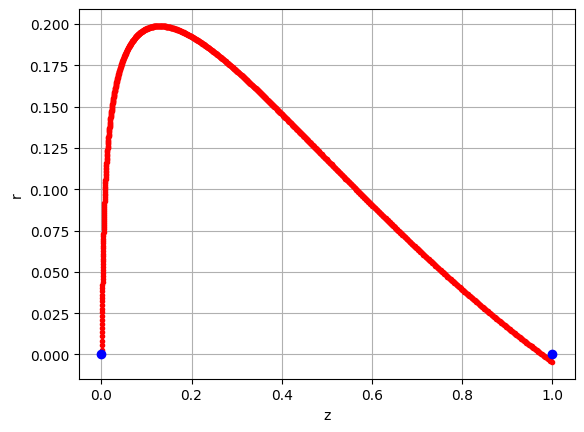

In [232]:
count=0

while count <= 200:

    count = count + 1
    wspan = (w[0], w[-1])
    
    #  Use the midpoint between high and low as our guess
    rprime0 = np.mean([10,2])
    
    #  Set the initial condition vector to be passed into the solver
    r0 = [0,1 ]

    # Solve the system using our guess
    sol = solve_ivp(equations, wspan, r0, t_eval = w)

    #  For ease of use, extract the function values from the solution object.
    r_num = sol.y[0, :]

    #  Check to see if we within our desire tolerance
    if np.abs(r_num[-1]) <=0.1:
        break
    
    #  Adjust our bounds if we are not within tolerance
    if r_num[-1] < 0:
        high = rprime0
    else:
        low = rprime0
        
    #print(count, r_num[-1])
    
#  Plot the solution and compare it to the analytical form defined above

plt.plot(z, r_num, 'r.', label='Numeric')
plt.plot([ 0,L], [0,0], 'bo')
plt.grid(True)
plt.xlabel('z')
plt.ylabel('r')